# Ejercicio 01

Un analista hace un estudio químico y espera que el rendimiento de cierta sustancia se vea afectado por dos factores. Se realizan 17 experimentos cuyos datos se registran en el cuadro siguiente. Por experimentos similares, se sabe que los factores  
$x_1$ y $x_2$ no están relacionados; por ello, el analista decide utilizar un modelo de regresión lineal múltiple. Calcule el modelo de regresión y grafíquelo sobre las observaciones.

## 0. Import Librerías

In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error , r2_score

## 1. Import datos y División de Datos

In [18]:
# Carga de datos 

Experimentos = pd.read_csv('./est_quimico.csv',index_col=0)

Experimentos

,x1,x2,y
Experimento,,,
1,41.9,29.1,251.3
2,43.4,29.3,251.3
3,43.9,29.5,248.3
4,44.5,29.7,267.5
5,47.3,29.9,273.0
6,47.5,30.3,276.5
7,47.9,30.5,270.3
8,50.2,30.7,274.9
9,52.8,30.8,285.0


In [19]:
# División de los Datos en X y Y

size_n = Experimentos.shape[0]

DataX = Experimentos[['x1','x2']].to_numpy()
MatrizX = np.concat([np.ones((size_n,1)),DataX],axis=1)

RealValuesY = Experimentos[['y']].to_numpy()

## 2. Modelo de Regresión Lineal

### 2.1. Manual

Se realiza el procedimiento vistó en clase ([Actividad 2](../Clases/Actividad_02.ipynb)) para estimar los parámetros del modelo $\beta$.

In [20]:
EstimatorBeta = np.linalg.inv(MatrizX.T@MatrizX) @ MatrizX.T @ RealValuesY

EstimatorBeta

array([[-151.75799982],
       [   1.25389314],
       [  12.00081181]])

In [21]:
EstimatorY_Manual = MatrizX@EstimatorBeta

### 2.2. Modelo

Se hace uso del modelo implementado en Scikit-Learn para Regresión Lineal ([`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html))

In [31]:
Model = LinearRegression()
Model.fit(MatrizX,RealValuesY)

EstimatorY_Model = Model.predict(MatrizX)

# 3. Observaciones contra Estimaciones

Al momento de que se grafican las los valores observados y estimados (predichos) permite evaluar de forma gráfica (visual) qué tan bien se ajusta el modelo para predecir el rendimientoo de la reacción (experimento).

El valor de SSE (`413.0143`) y el $R^2$ score (`0.9688`) permiten medir qué tan bien se ajusta el modelo para predicir los valores; con estos valores permiten decir que si se realiza un buen ajuste para realizar las predicciones.

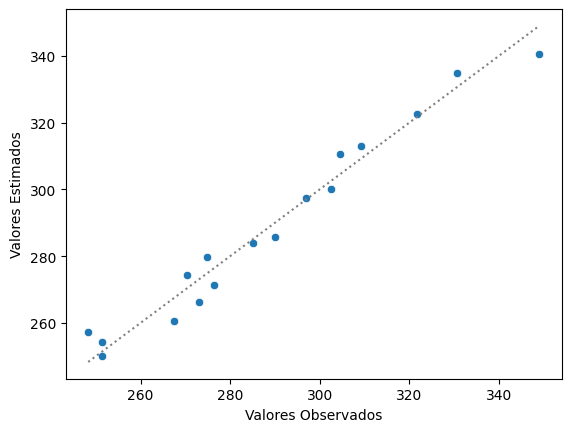

In [ ]:
# Plotting de los valores esperados (obsevados) y estimados

fig , axes = plt.subplots()

sns.scatterplot(
    x=RealValuesY[:,0],
    y=EstimatorY_Manual[:,0],
    ax=axes,
)

sns.lineplot(
    x=RealValuesY[:,0],
    y=RealValuesY[:,0],
    color='gray',
    linestyle=':',
)

axes.set_xlabel('Valores Observados')
axes.set_ylabel('Valores Estimados');

In [ ]:
# Calculo de SSE

SSE = (RealValuesY.T@RealValuesY - 2*EstimatorY_Manual.T@RealValuesY + EstimatorY_Manual.T@EstimatorY_Manual)[0,0]

SSE

np.float64(413.0143294376321)

In [ ]:
# Estimación de varianza

EstimatorSquareSigma = SSE / (size_n - EstimatorBeta.shape[0])

EstimatorSquareSigma

np.float64(29.501023531259438)

In [ ]:
# R^2 Score de los datos

Model.score(MatrizX,RealValuesY)

0.9688049045268312